In [1]:
#veri seti indirme
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
!tar -xvf /content/UrbanSound8K.tar.gz

Görüntülenen çıkış son 5000 satıra kısaltıldı.
UrbanSound8K/audio/fold4/17480-2-0-6.wav
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio/fol

In [2]:
#kütüphanelerin eklenmesi
import tensorflow as tf
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa.display

#görüntü işleme için
import cv2
from google.colab.patches import cv2_imshow

In [3]:
#veri işleme
veri = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
className = veri.iloc[0:8000,7:]

veri1 = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
slice_name = veri1.iloc[0:8000,0:1]

veri2 = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
fold_name = veri2.iloc[0:8000,5:6]

veri3 = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
classID_name = veri3.iloc[0:8000,6:7]

In [4]:
#sesi goruntuye donusturme fonksiyonu
def create_spectrogram(y):
    spec = librosa.feature.melspectrogram(y=y)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

In [5]:
#her fold içindeki tüm classID'ler ile işlem yapar

if "gorsel" not in os.listdir():
    os.mkdir("gorsel")

if "opencv_gorsel" not in os.listdir():
    os.mkdir("opencv_gorsel")


i = 0
file_name = ''
fold = ''
dosya_yolu =''
audio_data = ''
images = []

while i < 2300:
  a = '/content/UrbanSound8K/audio/fold'
  if(fold_name.values[i]!=-1):
    dosya_isim = slice_name.values[i]
    print(dosya_isim)
    dosya_isim1 = dosya_isim[0]
    print(dosya_isim1)

    fold_isim = fold_name.values[i]
    print(fold_isim)
    fold = str(fold_isim[0])
    print(fold)


    audio_data = '/content/UrbanSound8K/audio/fold'+fold+'/'+dosya_isim1
    print(audio_data)
    x , sr = librosa.load(audio_data)
    spectrogram = create_spectrogram(x)
    print(type(x), type(sr))
    print(x.shape, sr)
    plt.figure()
    librosa.display.specshow(spectrogram)
    

    n = i
    n =str(n)
    file_name = '/content/gorsel/gorsel'+n+'.png'
    plt.savefig(file_name)
    plt.close()
    

    #listeye elemanini alma
    etiket_eleman = classID_name.values[i]

    img = cv2.imread(file_name, 0)
    #cv2_imshow(img)
    opencv_isim = '/content/opencv_gorsel/gorsel'+n+'.png'
    cv2.imwrite(opencv_isim, img)
    img = cv2.resize(img, (128,128))
    img = img/255
    images.append([img, int(etiket_eleman[0])])
    #cv2.waitKey()
    #cv2.destroyAllWindows()

    n = int(n)
  i+=1
  print("-----------------İŞLEM DEGERİ : \t",i)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
['143970-5-0-1.wav']
143970-5-0-1.wav
[2]
2
/content/UrbanSound8K/audio/fold2/143970-5-0-1.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050
-----------------İŞLEM DEGERİ : 	 1676
['143970-5-0-2.wav']
143970-5-0-2.wav
[2]
2
/content/UrbanSound8K/audio/fold2/143970-5-0-2.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050
-----------------İŞLEM DEGERİ : 	 1677
['143970-5-0-3.wav']
143970-5-0-3.wav
[2]
2
/content/UrbanSound8K/audio/fold2/143970-5-0-3.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050
-----------------İŞLEM DEGERİ : 	 1678
['144007-5-0-0.wav']
144007-5-0-0.wav
[4]
4
/content/UrbanSound8K/audio/fold4/144007-5-0-0.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050
-----------------İŞLEM DEGERİ : 	 1679
['144007-5-0-1.wav']
144007-5-0-1.wav
[4]
4
/content/UrbanSound8K/audio/fold4/144007-5-0-1.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050
-----------------İŞLEM DEGERİ : 	 1680
['144007-5-0-10.wa

In [6]:
#listeyi bölme
X = []
y = []

images_uzunluk = len(images)

uzunluk_x = int(len(images)*(8/10))
uzunluk_y = int(len(images)*(8/10))

uzunluk_x_test = int(len(images)*(9/10))
uzunluk_y_test = int(len(images)*(9/10))

for image_file, idx in images:
    X.append(image_file)
    y.append(idx)

X_train = X[:uzunluk_x]
y_train = y[:uzunluk_y]

X_val = X[uzunluk_x:uzunluk_x_test]
y_val = y[uzunluk_y:uzunluk_y_test]

X_test = X[uzunluk_x_test:]
y_test = y[uzunluk_y_test:]


print("images uzunluk:\t",images_uzunluk,"\n")
print("X uzunluk %80 degeri:\t",uzunluk_x,"\n")
print("Y uzunluk %80 degeri:\t",uzunluk_y,"\n")
print("X uzunluk %90 degeri:\t",uzunluk_x_test,"\n")
print("Y uzunluk %90 degeri:\t",uzunluk_y_test,"\n")

images uzunluk:	 2300 

X uzunluk %80 degeri:	 1840 

Y uzunluk %80 degeri:	 1840 

X uzunluk %90 degeri:	 2070 

Y uzunluk %90 degeri:	 2070 



In [7]:
#liste boyutlandırma ve donusumleri
import random
import pickle

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(-1, 128, 128, 1) 
X_val = X_val.reshape(-1, 128, 128, 1) 
X_test = X_test.reshape(-1, 128, 128, 1) 

if "pickles" not in os.listdir():
    os.mkdir("pickles")

with open("pickles/X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("pickles/y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("pickles/X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("pickles/y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("pickles/X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("pickles/y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)

In [8]:
# Model
model = tf.keras.Sequential()

# Feature Extraction
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", input_shape=(128, 128, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(tf.keras.layers.Flatten())

# Classification
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Output Layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))


model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val))





Epoch 1/1000
58/58 [==============================] - 11s 13ms/step - loss: 2.2640 - accuracy: 0.1554 - val_loss: 2.3982 - val_accuracy: 0.0217
Epoch 2/1000
58/58 [==============================] - 0s 6ms/step - loss: 2.2445 - accuracy: 0.1821 - val_loss: 2.4182 - val_accuracy: 0.0217
Epoch 3/1000
58/58 [==============================] - 0s 6ms/step - loss: 2.2190 - accuracy: 0.1946 - val_loss: 2.4623 - val_accuracy: 0.0217
Epoch 4/1000
58/58 [==============================] - 0s 7ms/step - loss: 2.1449 - accuracy: 0.1989 - val_loss: 2.7115 - val_accuracy: 0.0217
Epoch 5/1000
58/58 [==============================] - 0s 7ms/step - loss: 2.0339 - accuracy: 0.2353 - val_loss: 2.6986 - val_accuracy: 0.1087
Epoch 6/1000
58/58 [==============================] - 0s 7ms/step - loss: 1.9188 - accuracy: 0.3060 - val_loss: 2.7145 - val_accuracy: 0.1174
Epoch 7/1000
58/58 [==============================] - 0s 7ms/step - loss: 1.7900 - accuracy: 0.3435 - val_loss: 2.9564 - val_accuracy: 0.1043
Epoc

In [9]:
result = model.evaluate(X_test, y_test)
print(f"Loss: {result[0]} - Accuracy: {result[1]}")

8/8 [==============================] - 0s 4ms/step - loss: 13.8099 - accuracy: 0.5435
Loss: 13.809857368469238 - Accuracy: 0.54347825050354


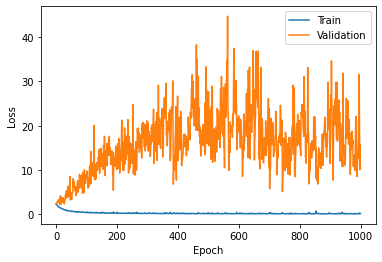

In [10]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()

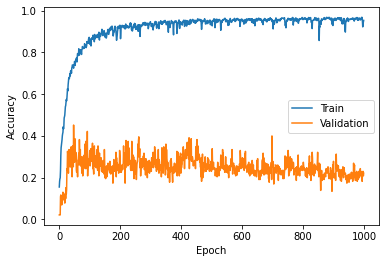

In [11]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [12]:
#modeli kaydetmek
with open("model_sound_cnn.pickle", "wb") as f:
  pickle.dump(history, f)  

In [ ]:
!zip -r opencv.zip '/content/opencv_gorsel'

In [ ]:
!zip -r opencv.zip '/content/gorsel'

In [15]:
!zip -r opencv.zip '/content/pickles'

  adding: content/pickles/ (stored 0%)
  adding: content/pickles/X_val.pickle (deflated 94%)
  adding: content/pickles/X_train.pickle (deflated 92%)
  adding: content/pickles/y_val.pickle (deflated 90%)
  adding: content/pickles/X_test.pickle (deflated 92%)
  adding: content/pickles/y_test.pickle (deflated 89%)
  adding: content/pickles/y_train.pickle (deflated 96%)
